导入库

In [10]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
from compareFragments import compareFragments
from audio2vec import * # 导入原始信号和判决信号

# Sine+Filter Method

## 分割数组

In [12]:
# 计算每个元素与前一个元素的差值
diff_arr = np.diff(result_array)

# 找出差值数组中所有大于0的元素的下标
indexes = np.where(diff_arr > 0)[0]

# 将这些下标加上1，得到所有比前一个元素大的元素的下标
indexes += 1

# 使用split函数根据这些下标将数组分割成子数组
sub_arrays = np.split(result_array, indexes)


## 信号重建

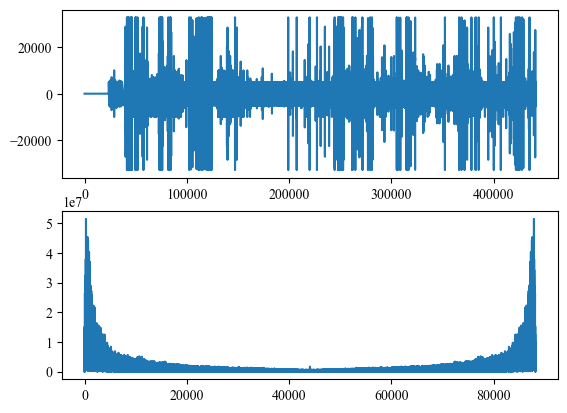

In [14]:
from rebuild_sine import rebuild_sine

rebuild_sound = [0]*(sum(len(arr) for arr in sub_arrays)) # 一维数组
index = 0 # 记录当前重新构建数组的位置
for arr in sub_arrays:
  rebuild_sound[index:index+len(arr)] = rebuild_sine(arr,value) # 直接赋值，不使用append
  index += len(arr) # 更新位置
rebuild_sound = np.array(rebuild_sound,dtype=np.int16)

plt.subplot(2,1,1)
plt.plot(rebuild_sound)

fft_rebuild = np.fft.fft(rebuild_sound)
freq = np.arange(0, len(fft_rebuild)) / len(fft_rebuild) * 2* sample_rate
plt.subplot(2,1,2)
plt.plot(freq,np.abs(fft_rebuild))

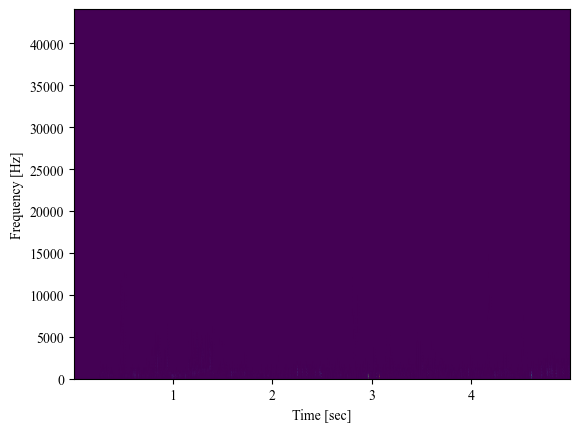

In [15]:
f, t, Sxx = sp.signal.spectrogram(rebuild_sound, 2*sample_rate)

plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

截取片段对比

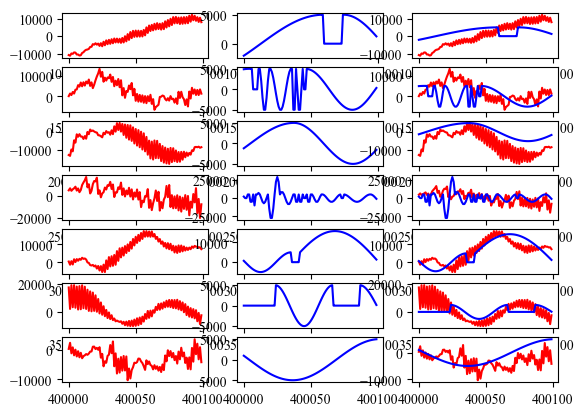

In [16]:
start = [100000,150000,200000,250000,300000,350000,400000]
compareFragments(sample_cut,rebuild_sound,start,100)

## 播放音频

In [17]:
from pydub.playback import play

resound = AudioSegment(
    data=np.array(rebuild_sound, dtype=np.int16),  
    # 这里准确来说输入byte数据才行（int16也行）
    # 这个会根据byte数据的数组长度进行一个判断，使用int16补上几个数据就行
    sample_width=2,
    frame_rate=sample_rate,
    channels=2
)

# play(resound)
resound.export("rebuild_sine.mp3", format="mp3")

<_io.BufferedRandom name='rebuild_sine.mp3'>

# 恢复度分析

In [18]:
loss_threshold = np.mean((np.abs(fft_threshold)-np.abs(fft_original))**2)
print(f"Threshold loss is \t{loss_threshold:.2e}")

loss_rebuild = np.mean((np.abs(fft_rebuild)-np.abs(fft_original))**2)
rebuild_rate = (loss_threshold-loss_rebuild)/loss_threshold
print(f"Rebuild loss is \t{loss_rebuild:.2e}, \trebuild rate is \t{rebuild_rate:.2%}")

Threshold loss is 	2.36e+13
Rebuild loss is 	2.41e+13, 	rebuild rate is 	-2.19%
